In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<ipython-input-1-56fe9589b206>:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
data = pd.read_csv('https://gitfront.io/r/user-9324447/W4ee46hfqoew/Personal-Projects/raw/Student%27s%20Dropout%20Rate%20Project/dataset.csv')
print("-"*50)
print("Dữ liệu được nhập thành công!!")
data.head(3).style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

--------------------------------------------------
Dữ liệu được nhập thành công!!


,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18,Column 19,Column 20,Column 21,Column 22,Column 23,Column 24,Column 25,Column 26,Column 27,Column 28,Column 29,Column 30,Column 31,Column 32,Column 33,Column 34,Column 35
0,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
2,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.0,0,0,6,6,6,13.666666666666666,0,13.9,-0.3,0.79,Graduate


In [ ]:
#Sửa lại tên các tính năng
data.columns = data.iloc[0]
data= data[1:].reset_index(drop = 1)
data.head(3).style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

0,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.0,0,0,6,6,6,13.666666666666666,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.0,0,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
def data_overview(df,head=5):
  print("shape of dataset ".center(125,'-'))
  print('Rows:{}'.format(df.shape[0]))
  print('columns:{}'.format(df.shape[1]))
  print("Head ".center(125,'-'))
  print(df.head(head))
  print("Data types".center(125,'-'))
  print(data.dtypes.value_counts())
  print("Missing values ".center(125,'-'))
  print(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False))
  print("Duplicate values ".center(125,'-'))
  print(df.duplicated().sum())
  print("Statistics os data ".center(125,'-'))
  print(df.describe(include="all"))
  print("Data info".center(125,'-'))
  print(df.info())

data_overview(data)

------------------------------------------------------shape of dataset ------------------------------------------------------
Rows:4427
columns:35
------------------------------------------------------------Head ------------------------------------------------------------
0 Marital status Application mode Application order Course  \
0              1                8                 5      2   
1              1                6                 1     11   
2              1                1                 5      5   
3              1                8                 2     15   
4              2               12                 1      3   

0 Daytime/evening attendance Previous qualification Nacionality  \
0                          1                      1           1   
1                          1                      1           1   
2                          1                      1           1   
3                          1                      1           1   
4                  

- Bộ dữ liệu có Hàng: 4427 và Cột: 35.

- Dataset có 1 kiểu dữ liệu là object(35)

- Bộ dữ liệu có giá trị NaN


1.xử lý giá trị còn thiếu

In [ ]:
print("Hình dạng dữ liệu trước khi xóa  NaN",data.shape)
data.dropna(subset=["Curricular units 1st sem (enrolled)","Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 1st sem (without evaluations)","Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"],axis=0,inplace=True)
print("Hình dạng dữ liệu sau khi xóa  NaN",data.shape)

Hình dạng dữ liệu trước khi xóa  NaN (4427, 35)
Hình dạng dữ liệu sau khi xóa  NaN (4424, 35)


In [ ]:
print("Thiếu giá trị trong mỗi cột sau khi xóa NaN:\n",data.isnull().sum())

Thiếu giá trị trong mỗi cột sau khi xóa NaN:
 0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International   

In [ ]:
print("Số lượng bản sao trước khi làm sạch:",data.duplicated().sum())
data = data.drop_duplicates(keep="first")
print("Số lượng bản sao sau khi làm sạch:",data.duplicated().sum())

Số lượng bản sao trước khi làm sạch: 1
Số lượng bản sao sau khi làm sạch: 0


In [ ]:
data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [ ]:
#Chuyển đổi giá trị cho heatmap
data['Target'] = data['Target'].replace('Graduate',2).replace('Dropout',0).replace('Enrolled',1)

In [ ]:
data= data.astype('float')
data = data.astype('int32')

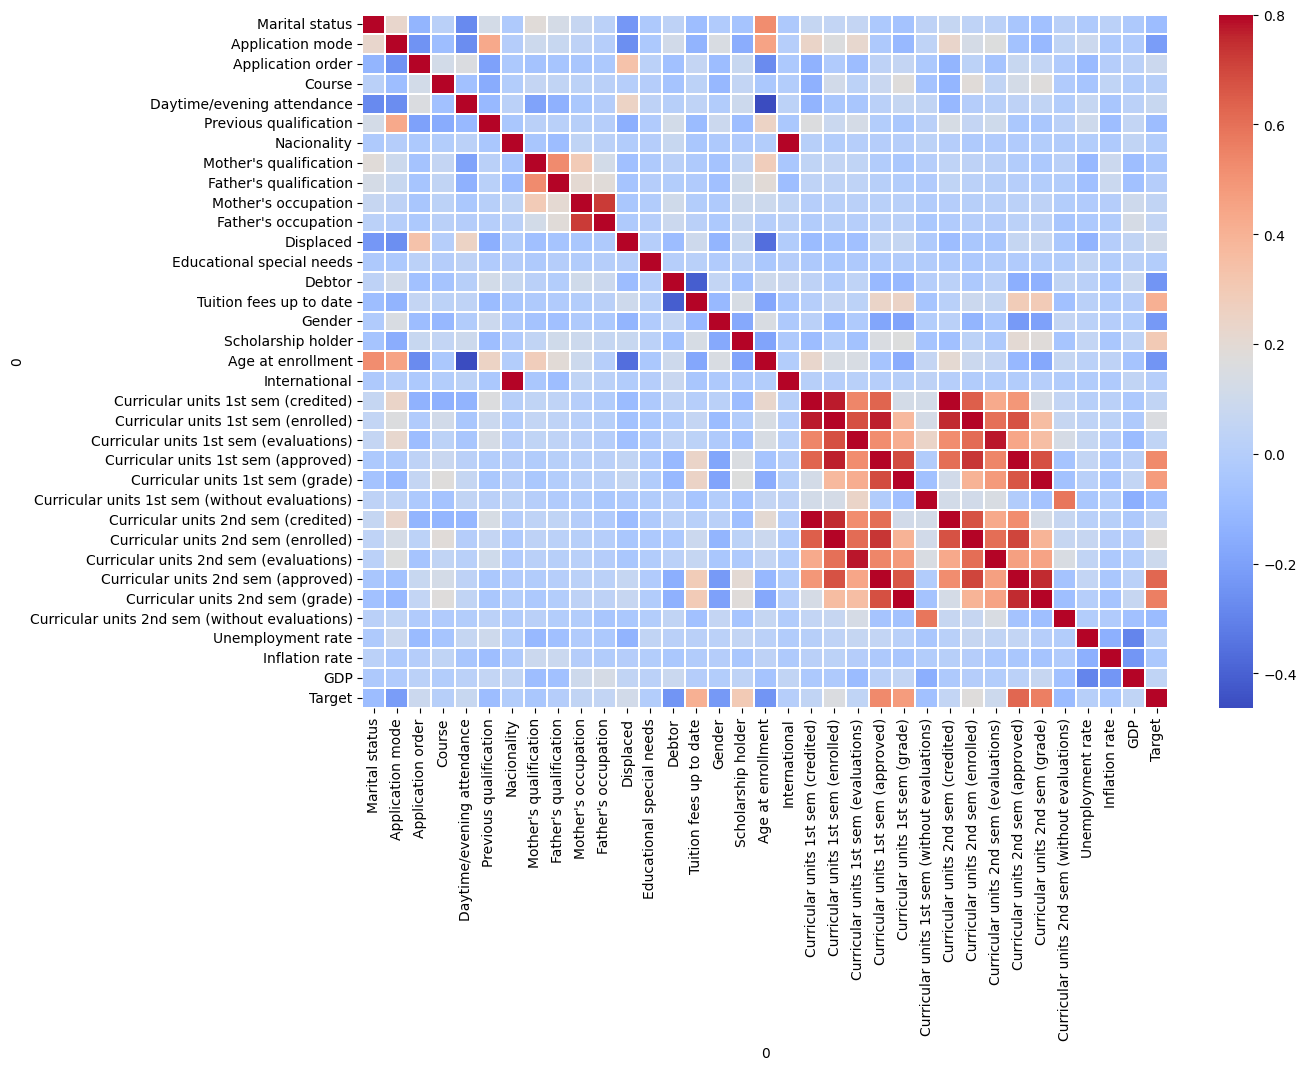

In [ ]:
plt.figure(figsize=(13,9))
sns.heatmap(data.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

In [ ]:
x = data.drop('Target',axis=1)
y = data.Target

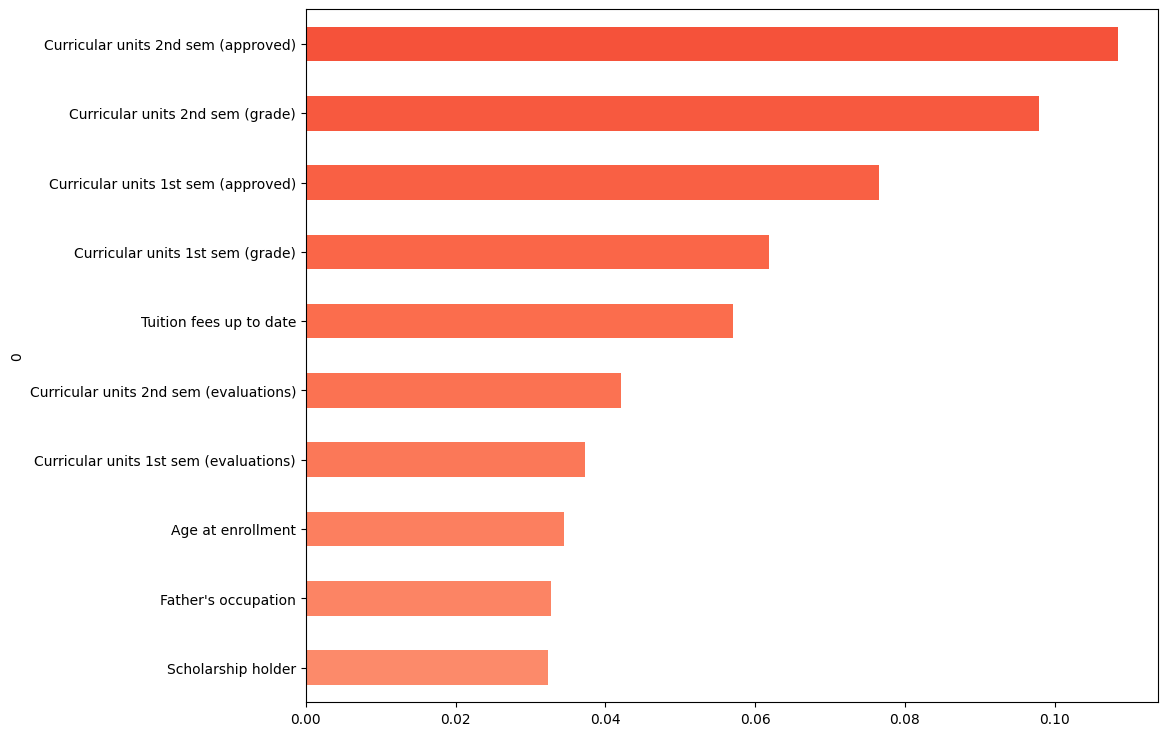

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree = ExtraTreesClassifier()
extra_tree.fit(x,y)
plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=x.columns)
colors = plt.cm.Reds(np.linspace(0.4, 1, len(feat_imp)))
chart=feat_imp.nlargest(10).sort_values().plot(kind='barh', color=colors)
plt.show()